In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

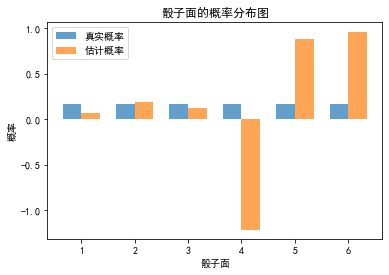

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体，用于支持中文显示
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

def likelihood_function(p, x):
    # 确保概率向量的和为1（由于浮点数计算误差，做归一化处理）
    p = p / np.sum(p)
    log_likelihood = 0
    for i in x:
        # 骰子面的索引从0开始，将观测值减1作为索引
        index = i - 1
        log_likelihood += np.log(p[index])
    return log_likelihood


def generate_observations(n):
    return np.random.randint(1, 7, size=n)


def gradient_descent(x, learning_rate=0.01, num_iterations=1000):
    # 初始化概率向量，初始化为均匀分布
    p = np.ones(6) / 6
    for _ in range(num_iterations):
        gradient = np.zeros(6)
        # 计算梯度
        for i in x:
            index = i - 1
            gradient[index] += 1 / p[index]
        gradient = gradient / len(x)
        # 更新概率向量
        p -= learning_rate * gradient
        # 归一化概率向量，确保其总和为1
        p = p / np.sum(p)
    return p


def plot_probability_distribution(true_p, estimated_p):
    bar_width = 0.35
    index = np.arange(6)
    plt.bar(index, true_p, bar_width, label='真实概率', alpha=0.7)
    plt.bar(index + bar_width, estimated_p, bar_width, label='估计概率', alpha=0.7)
    plt.xlabel('骰子面')
    plt.ylabel('概率')
    plt.title('骰子面的概率分布图')
    plt.xticks(index + bar_width / 2, [1, 2, 3, 4, 5, 6])
    plt.legend()
    plt.show()


def main():
    n = 1000  # 实验次数
    x = generate_observations(n)
    learning_rate = 0.01
    num_iterations = 1000
    estimated_p = gradient_descent(x, learning_rate, num_iterations)
    # 真实的骰子各面概率（均匀分布）
    true_p = np.ones(6) / 6
    plot_probability_distribution(true_p, estimated_p)


if __name__ == "__main__":
    main()